**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [4]:
txt_folder = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "result.cripsr_vs_starrmpra.logit.roc.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_union/result.cripsr_vs_starrmpra.logit.roc.tsv 


## Import data

In [5]:
### set directory
txt_foldr = "fcc_astarr_macs_input_union"
txt_fdiry = file.path(FD_RES, "analysis_fcc_correlation", txt_foldr)
txt_fname = "result.cripsr_vs_starrmpra.logit.roc.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_assay_logit_roc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 4374832       7


CutOff_CRISPR,Assay_CRISPR,Assay_STARRMPRA,x,y,AUROC,Performance
0.01,CRISPRi-HCRFF,ASTARR,0.9992401,1,0.6991424,ASTARR (0.7)
0.01,CRISPRi-HCRFF,ASTARR,0.9984802,1,0.6991424,ASTARR (0.7)
0.01,CRISPRi-HCRFF,ASTARR,0.9977204,1,0.6991424,ASTARR (0.7)


## Plot ROC curve

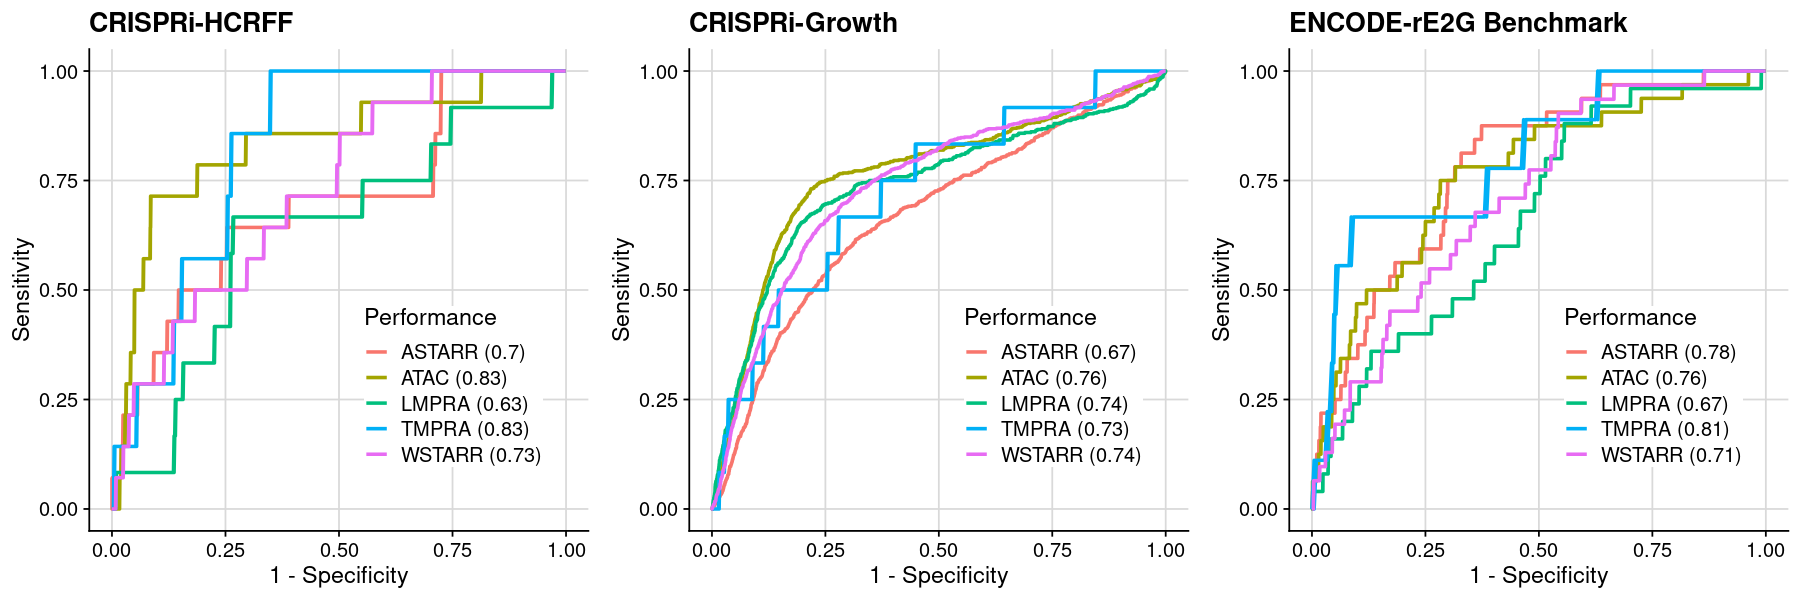

In [6]:
### init
dat = dat_assay_logit_roc

### choose cutoff
lst = split(dat, dat$CutOff_CRISPR)
dat = lst[["0.01"]]

### order CRISPR assay
lst = split(dat, dat$Assay_CRISPR)
lst = lst[VEC_TXT_ASSAY_OUT]

### loop through each CRISPR assay and plot ROC curve
lst = lapply(names(lst), function(idx){
    ### get table and name
    txt = idx
    dat = lst[[idx]]

    ### plot ROC curve
    gpt = ggplot(dat, aes(x=x, y=y, group=Assay_STARRMPRA, color=Performance)) +
        geom_line(linewidth=1) +
        labs(x = "1 - Specificity", y = "Sensitivity", title = txt) +
        theme_cowplot() +
        background_grid() +
        theme(
            legend.background = element_rect(fill="white"),
            legend.position   = "inside",
            legend.position.inside = c(0.55, 0.3)
        )
    return(gpt)
})

### assign and show
lst_gpt_export_auroc_by_assay = lst
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

## Export plots

**Set plotting style**

In [7]:
### set text size
THEME_TEXT = theme(
    title        = element_text(size = 16),
    axis.title   = element_text(size = 16),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 14),
    legend.text  = element_text(size = 14),
    strip.text   = element_text(size = 14)
)

**Update plot**

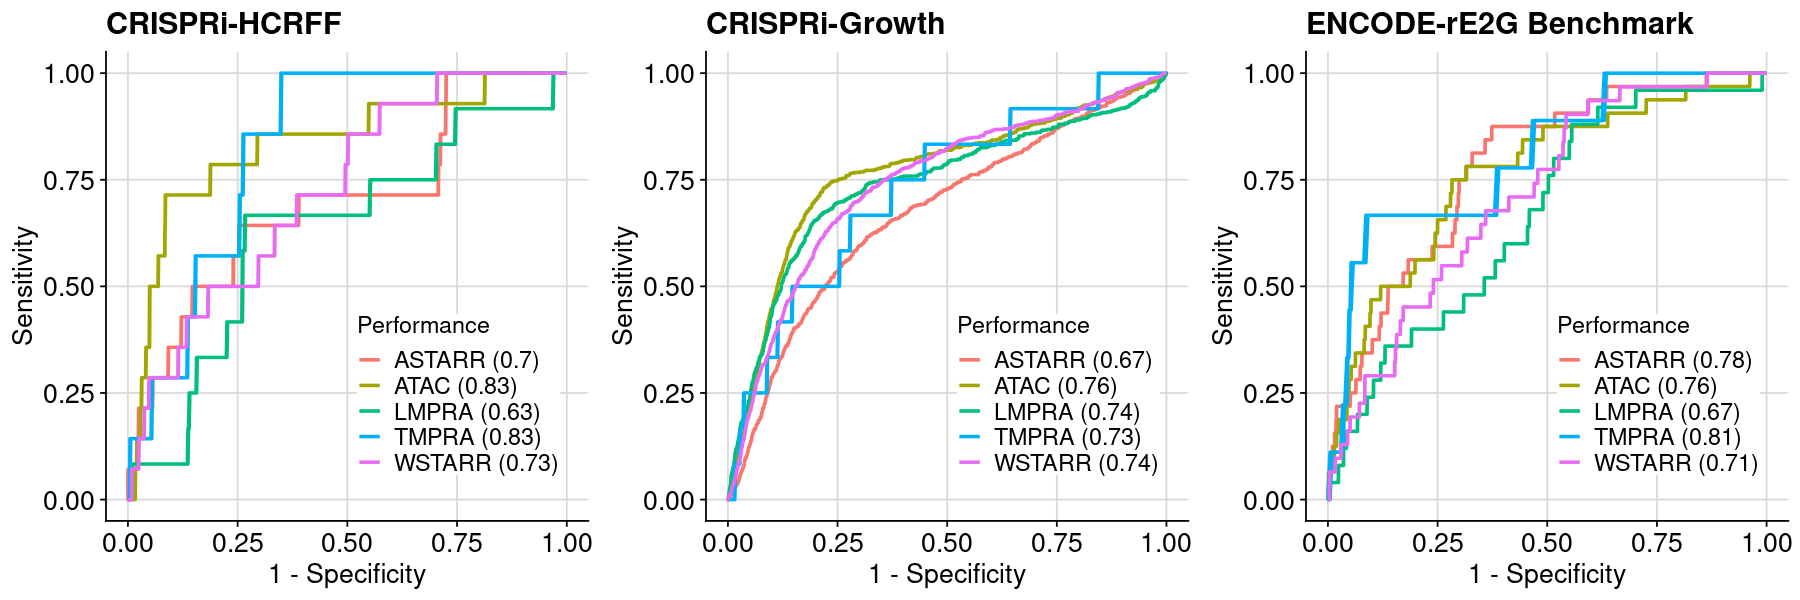

In [8]:
### set style
theme_text = THEME_TEXT

### udpate plot
lst = lst_gpt_export_auroc_by_assay
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        theme_text +
        theme(
            legend.background = element_rect(fill="white"),
            legend.position   = "inside",
            legend.position.inside = c(0.52, 0.27)
        ) 
    return(gpt)
})

### generate plot
plt = plot_grid(plotlist = lst, nrow = 1)

### assign and show
plt_export_auroc_by_assay = plt
options(repr.plot.height=5, repr.plot.width=15)
print(plt)

**Save plots**

In [9]:
plt_export = plt_export_auroc_by_assay
txt_export = "fig.region_coverage_fcc.logit.roc.crispr.top_one_percent"
num_height = 5
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")